In [1]:
# For some reason torch crashes if this is not included... Maybe some initialization going on behind the scenes
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7270, 0.9453, 0.8120],
        [0.5239, 0.5674, 0.7042],
        [0.2243, 0.3958, 0.7612],
        [0.1842, 0.3938, 0.7966],
        [0.0512, 0.8532, 0.6384]])


In [2]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

%load_ext autoreload
%autoreload 2

In [3]:
# Read from parent directory
df = pd.read_pickle(sys.path[0] + '/../processed_data/SARIMA_model_data')

print(df.shape)

n = df.shape[0]

(35064, 40)


In [4]:
training_set = df.Load1.to_numpy().reshape(-1,1)
print(training_set.shape)

training_set = training_set[-24*100:]
print(training_set.shape)

(35064, 1)
(2400, 1)


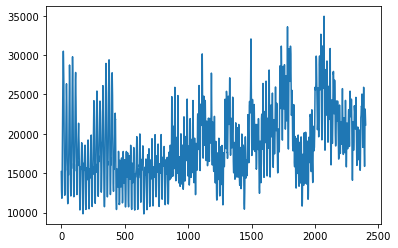

In [5]:
plt.plot(training_set)

# Data Processing:

In [6]:
# def seven_day_to_one_day(data):
    
#     INPUT_DAYS = 7
#     OUTPUT_DAYS = 1
    
#     num_periods = int(data.shape[0] / 24) - INPUT_DAYS
#     assert(data.shape[0] % 24 == 0)
    
#     input_length = INPUT_DAYS * 24
#     output_length = OUTPUT_DAYS * 24
    
#     x = np.zeros((num_periods, input_length))
#     y = np.zeros((num_periods, output_length))
    
#     for period in range(num_periods):
#         start_index = period * 24
#         _x = data[start_index : start_index + input_length]
#         _y = data[start_index + input_length : start_index + input_length + output_length]
        
#         x[period,:] = _x.T
#         y[period,:] = _y.T
        
#     return x, y

# # First scale input data to be between [0,1]
# sc = MinMaxScaler()
# training_data = sc.fit_transform(training_set)

# # Get processed data on which to train
# x, y = seven_day_to_one_day(training_data)


# train_size = int(len(y) * 0.67)
# test_size = len(y) - train_size
# dataX = Variable(torch.Tensor(np.array(x)))
# dataY = Variable(torch.Tensor(np.array(y)))

# # TRAINING
# trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
# trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

# # TESTING
# testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
# testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

# print("trainX shape:", trainX.shape) # 7 * 24 hours of data
# print("trianY shape:", trainY.shape) # 1 * 24 hours of data
# print("testX shape:", testX.shape)
# print("testY shape:", testY.shape)

# Credit to: https://github.com/oliverguhr/transformer-time-series-prediction/blob/master/transformer-multistep.py

<class 'pandas.core.series.Series'>
(4000,)
4000
<class 'pandas.core.series.Series'>


/Users/matthewjohnson/Desktop/STATS315B/Stats315B/Transformer/transformer_template.py:100: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


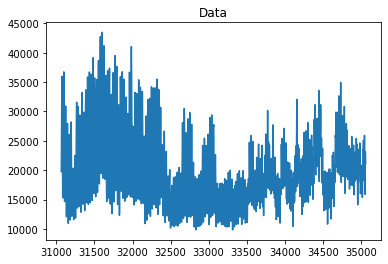

/Users/matthewjohnson/Desktop/STATS315B/Stats315B/Transformer/transformer_template.py:88: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:204.)
  return torch.FloatTensor(inout_seq)
/Users/matthewjohnson/opt/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:371: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


| epoch   1 |    49/  249 batches | lr 0.005000 | 90.13 ms | loss 4.53733 | ppl    93.44
| epoch   1 |    98/  249 batches | lr 0.005000 | 80.88 ms | loss 0.05060 | ppl     1.05
| epoch   1 |   147/  249 batches | lr 0.005000 | 85.06 ms | loss 0.03376 | ppl     1.03
| epoch   1 |   196/  249 batches | lr 0.005000 | 83.12 ms | loss 0.02453 | ppl     1.02
| epoch   1 |   245/  249 batches | lr 0.005000 | 81.09 ms | loss 0.01372 | ppl     1.01
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 22.83s | valid loss 0.03098 | valid ppl     1.03
-----------------------------------------------------------------------------------------
| epoch   2 |    49/  249 batches | lr 0.004513 | 75.16 ms | loss 0.03994 | ppl     1.04
| epoch   2 |    98/  249 batches | lr 0.004513 | 74.17 ms | loss 0.03091 | ppl     1.03
| epoch   2 |   147/  249 batches | lr 0.004513 | 70.70 ms | loss 0.01697 | ppl     1.02
| epoch   2 |   196/  249 batche

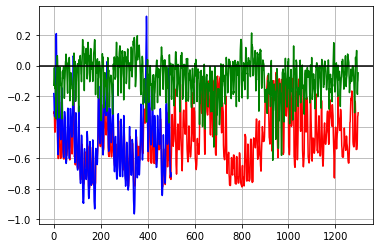

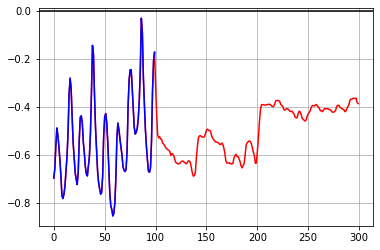

-----------------------------------------------------------------------------------------
| end of epoch   2 | time: 28.94s | valid loss 0.02157 | valid ppl     1.02
-----------------------------------------------------------------------------------------


/Users/matthewjohnson/opt/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:371: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


| epoch   3 |    49/  249 batches | lr 0.004287 | 75.87 ms | loss 0.02145 | ppl     1.02
| epoch   3 |    98/  249 batches | lr 0.004287 | 73.48 ms | loss 0.02369 | ppl     1.02
| epoch   3 |   147/  249 batches | lr 0.004287 | 72.94 ms | loss 0.01567 | ppl     1.02
| epoch   3 |   196/  249 batches | lr 0.004287 | 73.85 ms | loss 0.01563 | ppl     1.02
| epoch   3 |   245/  249 batches | lr 0.004287 | 74.23 ms | loss 0.00813 | ppl     1.01
-----------------------------------------------------------------------------------------
| end of epoch   3 | time: 20.04s | valid loss 0.02138 | valid ppl     1.02
-----------------------------------------------------------------------------------------
| epoch   4 |    49/  249 batches | lr 0.004073 | 65.13 ms | loss 0.01587 | ppl     1.02
| epoch   4 |    98/  249 batches | lr 0.004073 | 63.37 ms | loss 0.01689 | ppl     1.02
| epoch   4 |   147/  249 batches | lr 0.004073 | 63.60 ms | loss 0.01090 | ppl     1.01
| epoch   4 |   196/  249 batche

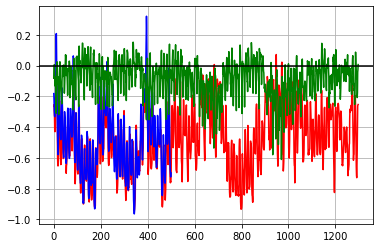

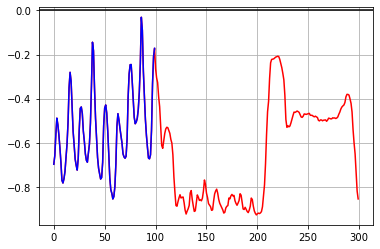

-----------------------------------------------------------------------------------------
| end of epoch   4 | time: 22.87s | valid loss 0.01917 | valid ppl     1.02
-----------------------------------------------------------------------------------------


/Users/matthewjohnson/opt/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:371: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


| epoch   5 |    49/  249 batches | lr 0.003869 | 62.68 ms | loss 0.01313 | ppl     1.01
| epoch   5 |    98/  249 batches | lr 0.003869 | 60.53 ms | loss 0.01392 | ppl     1.01
| epoch   5 |   147/  249 batches | lr 0.003869 | 59.84 ms | loss 0.00891 | ppl     1.01
| epoch   5 |   196/  249 batches | lr 0.003869 | 58.78 ms | loss 0.00809 | ppl     1.01
| epoch   5 |   245/  249 batches | lr 0.003869 | 59.50 ms | loss 0.00614 | ppl     1.01
-----------------------------------------------------------------------------------------
| end of epoch   5 | time: 16.61s | valid loss 0.02231 | valid ppl     1.02
-----------------------------------------------------------------------------------------
| epoch   6 |    49/  249 batches | lr 0.003675 | 63.39 ms | loss 0.01219 | ppl     1.01
| epoch   6 |    98/  249 batches | lr 0.003675 | 63.81 ms | loss 0.01421 | ppl     1.01
| epoch   6 |   147/  249 batches | lr 0.003675 | 64.56 ms | loss 0.00789 | ppl     1.01
| epoch   6 |   196/  249 batche

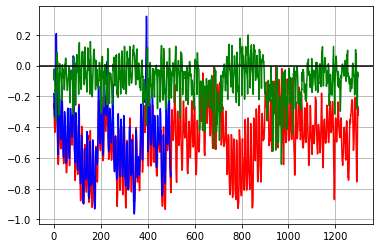

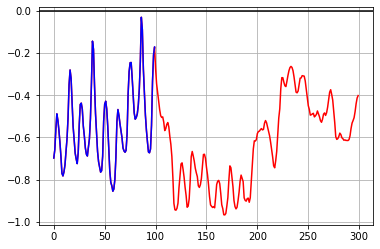

-----------------------------------------------------------------------------------------
| end of epoch   6 | time: 26.17s | valid loss 0.01910 | valid ppl     1.02
-----------------------------------------------------------------------------------------


/Users/matthewjohnson/opt/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:371: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


| epoch   7 |    49/  249 batches | lr 0.003492 | 77.21 ms | loss 0.01064 | ppl     1.01
| epoch   7 |    98/  249 batches | lr 0.003492 | 76.05 ms | loss 0.01250 | ppl     1.01
| epoch   7 |   147/  249 batches | lr 0.003492 | 78.32 ms | loss 0.00749 | ppl     1.01
| epoch   7 |   196/  249 batches | lr 0.003492 | 76.30 ms | loss 0.00676 | ppl     1.01
| epoch   7 |   245/  249 batches | lr 0.003492 | 76.93 ms | loss 0.00528 | ppl     1.01
-----------------------------------------------------------------------------------------
| end of epoch   7 | time: 20.86s | valid loss 0.01836 | valid ppl     1.02
-----------------------------------------------------------------------------------------
| epoch   8 |    49/  249 batches | lr 0.003317 | 61.67 ms | loss 0.01036 | ppl     1.01
| epoch   8 |    98/  249 batches | lr 0.003317 | 58.04 ms | loss 0.01140 | ppl     1.01
| epoch   8 |   147/  249 batches | lr 0.003317 | 58.27 ms | loss 0.00700 | ppl     1.01
| epoch   8 |   196/  249 batche

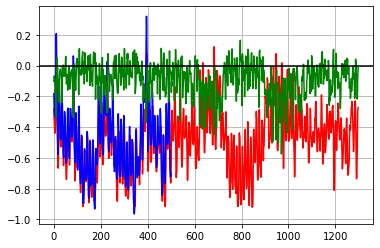

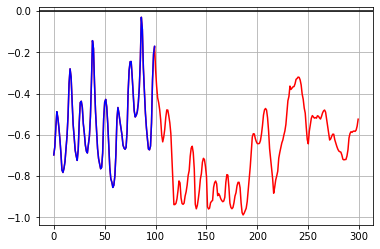

-----------------------------------------------------------------------------------------
| end of epoch   8 | time: 22.53s | valid loss 0.01597 | valid ppl     1.02
-----------------------------------------------------------------------------------------


/Users/matthewjohnson/opt/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:371: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


| epoch   9 |    49/  249 batches | lr 0.003151 | 65.10 ms | loss 0.00999 | ppl     1.01
| epoch   9 |    98/  249 batches | lr 0.003151 | 63.13 ms | loss 0.01162 | ppl     1.01
| epoch   9 |   147/  249 batches | lr 0.003151 | 64.02 ms | loss 0.00763 | ppl     1.01
| epoch   9 |   196/  249 batches | lr 0.003151 | 63.03 ms | loss 0.00647 | ppl     1.01
| epoch   9 |   245/  249 batches | lr 0.003151 | 65.83 ms | loss 0.00516 | ppl     1.01
-----------------------------------------------------------------------------------------
| end of epoch   9 | time: 17.61s | valid loss 0.01990 | valid ppl     1.02
-----------------------------------------------------------------------------------------
| epoch  10 |    49/  249 batches | lr 0.002994 | 68.42 ms | loss 0.01002 | ppl     1.01
| epoch  10 |    98/  249 batches | lr 0.002994 | 68.24 ms | loss 0.01103 | ppl     1.01
| epoch  10 |   147/  249 batches | lr 0.002994 | 64.40 ms | loss 0.00693 | ppl     1.01
| epoch  10 |   196/  249 batche

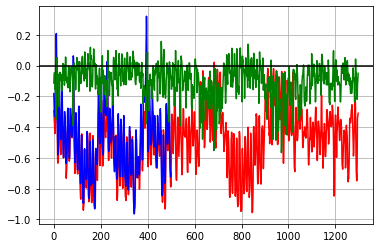

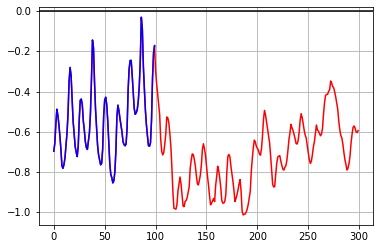

-----------------------------------------------------------------------------------------
| end of epoch  10 | time: 26.36s | valid loss 0.01943 | valid ppl     1.02
-----------------------------------------------------------------------------------------


/Users/matthewjohnson/opt/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:371: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


| epoch  11 |    49/  249 batches | lr 0.002844 | 68.60 ms | loss 0.01047 | ppl     1.01
| epoch  11 |    98/  249 batches | lr 0.002844 | 68.10 ms | loss 0.01104 | ppl     1.01
| epoch  11 |   147/  249 batches | lr 0.002844 | 66.31 ms | loss 0.00636 | ppl     1.01
| epoch  11 |   196/  249 batches | lr 0.002844 | 66.69 ms | loss 0.00568 | ppl     1.01
| epoch  11 |   245/  249 batches | lr 0.002844 | 67.47 ms | loss 0.00485 | ppl     1.00
-----------------------------------------------------------------------------------------
| end of epoch  11 | time: 18.40s | valid loss 0.01877 | valid ppl     1.02
-----------------------------------------------------------------------------------------
| epoch  12 |    49/  249 batches | lr 0.002702 | 89.85 ms | loss 0.01031 | ppl     1.01
| epoch  12 |    98/  249 batches | lr 0.002702 | 72.24 ms | loss 0.00989 | ppl     1.01


In [ ]:
from transformer_template import *